In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
mh_reddit_clean1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Github Repos/mh_reddit_clean1.csv')
mh_twitter_clean1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Github Repos/mh_twitter_clean1.csv')

In [7]:
!pip install imbalanced-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# **1. Final preprocessing**

In [24]:
# Defining the target labels from the 'emotion' column for Twitter and Reddit
y_twitter = mh_twitter_clean1['emotion']
y_reddit = mh_reddit_clean1['emotion']

### 1.1 TF-IDF Vectorisation



In [25]:
# Initialise TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

In [28]:
# Fit and transform Twitter data
X_twitter = vectorizer.fit_transform(mh_twitter_clean1['clean_text'])

In [29]:
# Fit and transform Reddit data
mh_reddit_clean1 = mh_reddit_clean1.dropna(subset=['clean_text'])
X_reddit = vectorizer.fit_transform(mh_reddit_clean1['clean_text'])
y_reddit = mh_reddit_clean1['emotion']

### 1.2 Label Encoding



In [30]:
label_encoder = LabelEncoder()

# Apply label encoding to Twitter and Reddit target labels (y_twitter) and (y_reddit)
y_twitter_encoded = label_encoder.fit_transform(y_twitter)
y_reddit_encoded = label_encoder.fit_transform(y_reddit)

In [31]:
# Create a DataFrame that holds the original emotions and their encoded labels for Twitter
twitter_encoded_df = pd.DataFrame({'emotion': y_twitter, 'encoded_emotion': y_twitter_encoded})
# Get the value counts for each class in Twitter
twitter_value_counts = twitter_encoded_df.value_counts(['emotion', 'encoded_emotion']).reset_index(name='count')
print("Twitter Emotion Counts with Encodings:")
print(twitter_value_counts)

Twitter Emotion Counts with Encodings:
    emotion  encoded_emotion  count
0       joy                2    773
1   sadness                4    591
2      fear                1    223
3     anger                0    196
4      love                3     26
5  surprise                5     10


In [32]:
# Create a DataFrame that holds the original emotions and their encoded labels for Reddit
reddit_encoded_df = pd.DataFrame({'emotion': y_reddit, 'encoded_emotion': y_reddit_encoded})
# Get the value counts for each class in Reddit
reddit_value_counts = reddit_encoded_df.value_counts(['emotion', 'encoded_emotion']).reset_index(name='count')
print("Reddit Emotion Counts with Encodings:")
print(reddit_value_counts)

Reddit Emotion Counts with Encodings:
    emotion  encoded_emotion  count
0   sadness                4   3034
1       joy                2   1860
2      fear                1   1360
3     anger                0    857
4      love                3    121
5  surprise                5     81


### 1.3 Data splitting

In [33]:
# Split data into training and testing sets
X_twitter_train, X_twitter_test, y_twitter_train, y_twitter_test = train_test_split(X_twitter, y_twitter_encoded, test_size=0.2, random_state=42)
X_reddit_train, X_reddit_test, y_reddit_train, y_reddit_test = train_test_split(X_reddit, y_reddit_encoded, test_size=0.2, random_state=42)

### 1.4  Addressing Class Imbalance by oversampling the minority classes

In [34]:
# Oversampling the minority classes (only on training data)
# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply random oversampling to the Twitter training data
X_twitter_train_resampled, y_twitter_train_resampled = ros.fit_resample(X_twitter_train, y_twitter_train)

# Apply random oversampling to the Reddit training data
X_reddit_train_resampled, y_reddit_train_resampled = ros.fit_resample(X_reddit_train, y_reddit_train)

In [35]:
# Count the number of samples in each class for Twitter data before oversampling
class_counts_twitter_before = np.bincount(y_twitter_encoded)
print("Twitter data class distribution before oversampling:", class_counts_twitter_before)

# Count the number of samples in each class for Reddit data before oversampling
class_counts_reddit_before = np.bincount(y_reddit_encoded)
print("Reddit data class distribution before oversampling:", class_counts_reddit_before)

Twitter data class distribution before oversampling: [196 223 773  26 591  10]
Reddit data class distribution before oversampling: [ 857 1360 1860  121 3034   81]


In [36]:
# Count the number of samples in each class for Twitter data after oversampling
class_counts_twitter_after = np.bincount(y_twitter_train_resampled)
print("Twitter data class distribution after oversampling:", class_counts_twitter_after)

# Count the number of samples in each class for Reddit data after oversampling
class_counts_reddit_after = np.bincount(y_reddit_train_resampled)
print("Reddit data class distribution after oversampling:", class_counts_reddit_after)


Twitter data class distribution after oversampling: [614 614 614 614 614 614]
Reddit data class distribution after oversampling: [2437 2437 2437 2437 2437 2437]


In [37]:
# Determine the number of classes
num_classes_twitter = max(len(class_counts_twitter_before), len(class_counts_twitter_after))
num_classes_reddit = max(len(class_counts_reddit_before), len(class_counts_reddit_after))

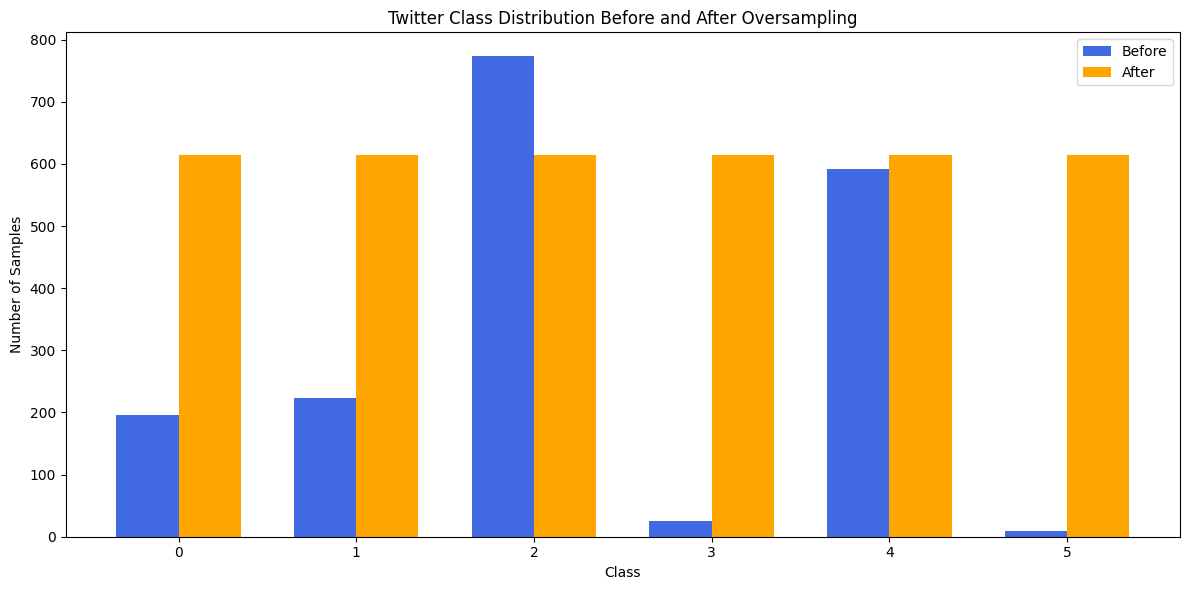

In [38]:
# Define bar width and index for the plots
bar_width = 0.35
index_twitter = np.arange(num_classes_twitter)

# Plotting Twitter data
plt.figure(figsize=(12, 6))
plt.bar(index_twitter, class_counts_twitter_before, bar_width, color='royalblue', label='Before')
plt.bar(index_twitter + bar_width, class_counts_twitter_after, bar_width, color='orange', label='After')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Twitter Class Distribution Before and After Oversampling')
plt.legend()
plt.xticks(index_twitter + bar_width / 2, range(num_classes_twitter))
plt.tight_layout()
plt.show()

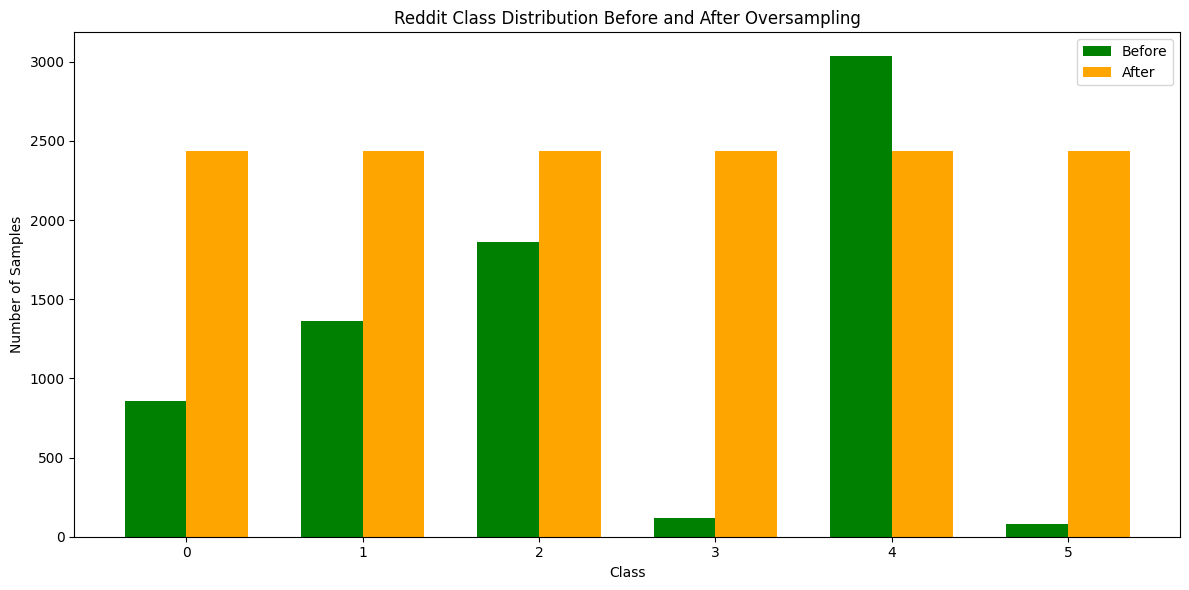

In [39]:
bar_width = 0.35
index_reddit = np.arange(num_classes_reddit)
# Plotting Reddit data
plt.figure(figsize=(12, 6))
plt.bar(index_reddit, class_counts_reddit_before, bar_width, color='green', label='Before')
plt.bar(index_reddit + bar_width, class_counts_reddit_after, bar_width, color='orange', label='After')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Reddit Class Distribution Before and After Oversampling')
plt.legend()
plt.xticks(index_reddit + bar_width / 2, range(num_classes_reddit))  # Adjust x-ticks for clarity
plt.tight_layout()
plt.show()

# **2.0 Modelling and Evaluation**

---



## 2.1 Single Platform Training (Train Models Separately)

### 2.1.1 Support Vector Machine (SVM)

In [40]:
# Train SVM model on resampled Twitter data
svm_model_twitter = SVC(kernel='linear')
svm_model_twitter.fit(X_twitter_train_resampled, y_twitter_train_resampled)

SVC(kernel='linear')

In [41]:
# Evaluate on the original Twitter test set
y_twitter_pred = svm_model_twitter.predict(X_twitter_test)
print("Twitter Model Performance on Test Set:")
print("Accuracy:", accuracy_score(y_twitter_test, y_twitter_pred))
print(classification_report(y_twitter_test, y_twitter_pred))

Twitter Model Performance on Test Set:
Accuracy: 0.3901098901098901
              precision    recall  f1-score   support

           0       0.10      0.03      0.04        39
           1       0.05      0.03      0.04        34
           2       0.44      0.73      0.55       159
           3       0.00      0.00      0.00         7
           4       0.34      0.20      0.25       122
           5       0.00      0.00      0.00         3

    accuracy                           0.39       364
   macro avg       0.16      0.16      0.15       364
weighted avg       0.32      0.39      0.33       364



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
# Train SVM model on resampled Reddit data
svm_model_reddit = SVC(kernel='linear')
svm_model_reddit.fit(X_reddit_train_resampled, y_reddit_train_resampled)

SVC(kernel='linear')

In [43]:
# Evaluate on the original Reddit test set
y_reddit_pred = svm_model_reddit.predict(X_reddit_test)
print("Reddit Model Performance on Test Set:")
print("Accuracy:", accuracy_score(y_reddit_test, y_reddit_pred))
print(classification_report(y_reddit_test, y_reddit_pred))

Reddit Model Performance on Test Set:
Accuracy: 0.37662337662337664
              precision    recall  f1-score   support

           0       0.15      0.02      0.03       164
           1       0.21      0.05      0.09       263
           2       0.23      0.08      0.12       393
           3       0.00      0.00      0.00        27
           4       0.41      0.84      0.55       597
           5       0.00      0.00      0.00        19

    accuracy                           0.38      1463
   macro avg       0.17      0.17      0.13      1463
weighted avg       0.28      0.38      0.27      1463



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


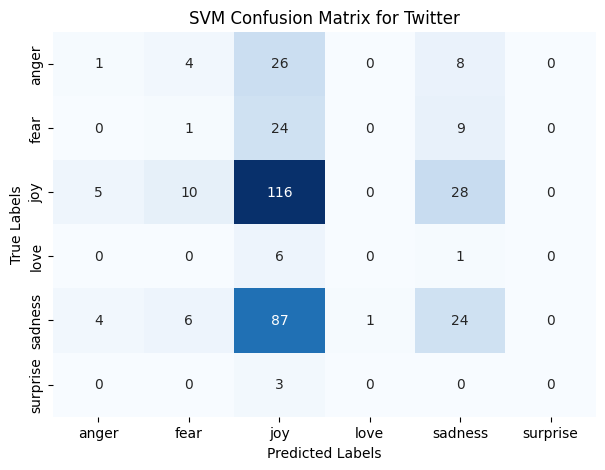

In [44]:
# Plot SVM Confusion Matrix

# Confusion Matrix for Twitter
# Get the confusion matrix
cm_twitter = confusion_matrix(y_twitter_test, y_twitter_pred)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm_twitter, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('SVM Confusion Matrix for Twitter')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

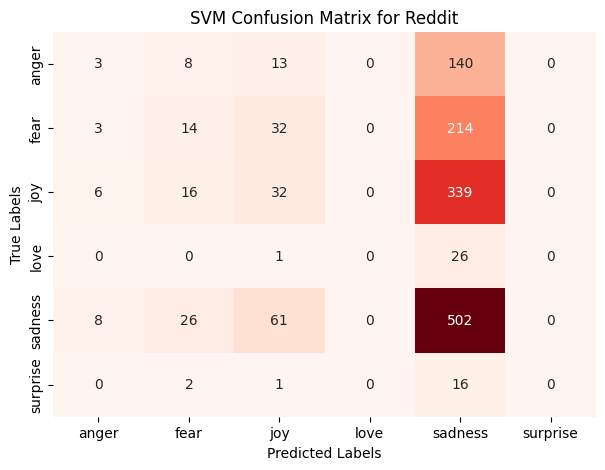

In [45]:
# SVM Confusion Matrix for Reddit
# Get the confusion matrix
cm_reddit = confusion_matrix(y_reddit_test, y_reddit_pred)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm_reddit, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('SVM Confusion Matrix for Reddit')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

###2.1.2 Naive Bayes Model

In [46]:
# Train Naive Bayes model on resampled Twitter data
nb_model_twitter = MultinomialNB()
nb_model_twitter.fit(X_twitter_train_resampled, y_twitter_train_resampled)

MultinomialNB()

In [47]:
# Evaluate on the original Twitter test set
y_twitter_pred = nb_model_twitter.predict(X_twitter_test)
print("Naive Bayes Model Performance on Twitter Test Set:")
print("Accuracy:", accuracy_score(y_twitter_test, y_twitter_pred))
print(classification_report(y_twitter_test, y_twitter_pred))

Naive Bayes Model Performance on Twitter Test Set:
Accuracy: 0.2445054945054945
              precision    recall  f1-score   support

           0       0.10      0.18      0.13        39
           1       0.09      0.21      0.13        34
           2       0.45      0.29      0.35       159
           3       0.11      0.29      0.15         7
           4       0.34      0.22      0.27       122
           5       0.00      0.00      0.00         3

    accuracy                           0.24       364
   macro avg       0.18      0.20      0.17       364
weighted avg       0.33      0.24      0.27       364



In [48]:
# Train Naive Bayes model on resampled Reddit data
nb_model_reddit = MultinomialNB()
nb_model_reddit.fit(X_reddit_train_resampled, y_reddit_train_resampled)

# Evaluate on the original Reddit test set
y_reddit_pred = nb_model_reddit.predict(X_reddit_test)
print("Naive Bayes Model Performance on Reddit Test Set:")
print("Accuracy:", accuracy_score(y_reddit_test, y_reddit_pred))
print(classification_report(y_reddit_test, y_reddit_pred))

Naive Bayes Model Performance on Reddit Test Set:
Accuracy: 0.24333561175666438
              precision    recall  f1-score   support

           0       0.12      0.23      0.16       164
           1       0.18      0.19      0.18       263
           2       0.28      0.21      0.24       393
           3       0.00      0.00      0.00        27
           4       0.40      0.31      0.35       597
           5       0.03      0.11      0.05        19

    accuracy                           0.24      1463
   macro avg       0.17      0.17      0.16      1463
weighted avg       0.28      0.24      0.26      1463



In [49]:
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

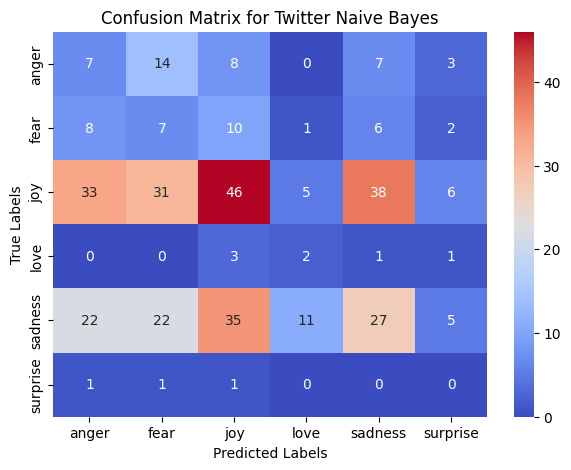

In [50]:
# Plot confusion matrix for Twitter Naive Bayes
plot_confusion_matrix(y_twitter_test, y_twitter_pred, classes=label_encoder.classes_, title='Confusion Matrix for Twitter Naive Bayes')

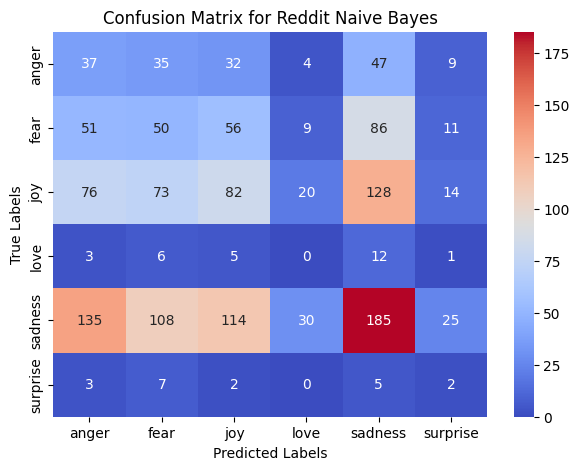

In [51]:
# Plot confusion matrix for Reddit Naive Bayes
plot_confusion_matrix(y_reddit_test, y_reddit_pred, classes=label_encoder.classes_, title='Confusion Matrix for Reddit Naive Bayes')

## 2.2 Cross Platform Training (Train on one platform and test on another and vice versa)

Fit TF-IDF on Combined Data:
To ensure that both datasets have the same feaures (vocabulary), fit the TfidfVectorizer on the combined text data from both Twitter and Reddit, then transform the datasets separately.

In [70]:
# Combine the text data from both Twitter and Reddit
combined_text = mh_twitter_clean1['clean_text'].tolist() + mh_reddit_clean1['clean_text'].tolist()

In [71]:
# Initialise and fit TF-IDF vectorizer on combined text data
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
vectorizer.fit(combined_text)

TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

In [72]:
# Transform Twitter and Reddit text data using the fitted vectorizer
X_twitter_combined = vectorizer.transform(mh_twitter_clean1['clean_text'])
X_reddit_combined = vectorizer.transform(mh_reddit_clean1['clean_text'])

In [73]:
# Initialize the label encoder
label_encoder = LabelEncoder()

In [74]:
# Fit label encoder on combined labels
combined_labels = mh_twitter_clean1['emotion'].tolist() + mh_reddit_clean1['emotion'].tolist()
label_encoder.fit(combined_labels)

# Encode Twitter and Reddit labels
y_twitter_encoded = label_encoder.transform(mh_twitter_clean1['emotion'])
y_reddit_encoded = label_encoder.transform(mh_reddit_clean1['emotion'])

In [75]:
# Split Twitter and Reddit data into training and testing sets
X_twitter_train, X_twitter_test, y_twitter_train, y_twitter_test = train_test_split(
    X_twitter_combined, y_twitter_encoded, test_size=0.2, random_state=42)

X_reddit_train, X_reddit_test, y_reddit_train, y_reddit_test = train_test_split(
    X_reddit_combined, y_reddit_encoded, test_size=0.2, random_state=42)

### 2.2.1 Train on Twitter and Test on Reddit: Support Vector Machine



In [76]:
# Train SVM on Twitter and test on Reddit
svm_model_twitter = SVC(kernel='linear', class_weight='balanced')
svm_model_twitter.fit(X_twitter_train, y_twitter_train)

SVC(class_weight='balanced', kernel='linear')

In [77]:
# Evaluate on Reddit test data
y_reddit_pred = svm_model_twitter.predict(X_reddit_test)
print("SVM Model Performance (Twitter Train, Reddit Test):")
print(classification_report(y_reddit_test, y_reddit_pred, target_names=label_encoder.classes_))

SVM Model Performance (Twitter Train, Reddit Test):
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       164
        fear       0.00      0.00      0.00       263
         joy       0.26      0.13      0.18       393
        love       0.00      0.00      0.00        27
     sadness       0.40      0.85      0.55       597
    surprise       0.00      0.00      0.00        19

    accuracy                           0.38      1463
   macro avg       0.11      0.16      0.12      1463
weighted avg       0.23      0.38      0.27      1463



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


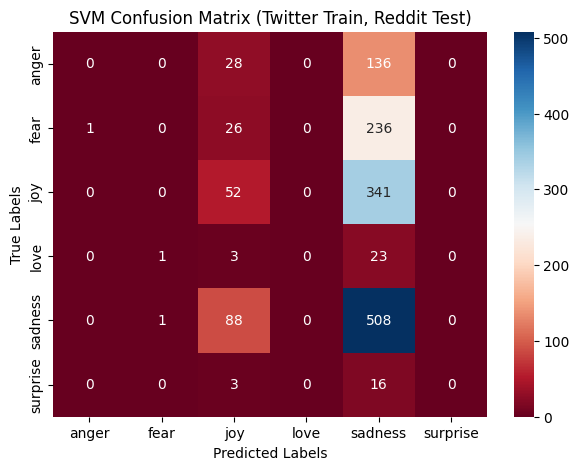

In [78]:
# Compute confusion matrix for Twitter train and Reddit test
cm_reddit = confusion_matrix(y_reddit_test, y_reddit_pred)

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm_reddit, annot=True, fmt='d', cmap='RdBu', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('SVM Confusion Matrix (Twitter Train, Reddit Test)')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

## 2.2.2 Train on Reddit and Test on Twitter : Support Vector Machine

In [79]:
# Train SVM model on Reddit data
svm_model_reddit = SVC(kernel='linear', class_weight='balanced')
svm_model_reddit.fit(X_reddit_train, y_reddit_train)

SVC(class_weight='balanced', kernel='linear')

In [80]:
# Evaluate on Twitter test data
y_twitter_pred = svm_model_reddit.predict(X_twitter_test)
print("SVM Model Performance (Reddit Train, Twitter Test):")
print(classification_report(y_twitter_test, y_twitter_pred, target_names=label_encoder.classes_))

SVM Model Performance (Reddit Train, Twitter Test):
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        39
        fear       0.07      0.03      0.04        34
         joy       0.37      0.21      0.27       159
        love       0.00      0.00      0.00         7
     sadness       0.33      0.68      0.44       122
    surprise       0.00      0.00      0.00         3

    accuracy                           0.32       364
   macro avg       0.13      0.15      0.13       364
weighted avg       0.28      0.32      0.27       364



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


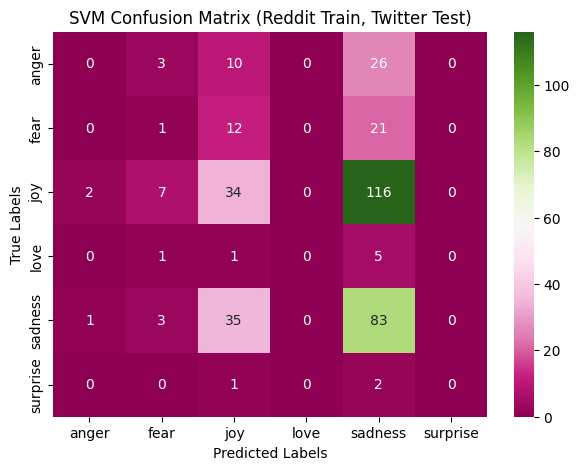

In [81]:
# Compute confusion matrix for Reddit train and Twitter test
cm_twitter = confusion_matrix(y_twitter_test, y_twitter_pred)

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm_twitter, annot=True, fmt='d', cmap='PiYG', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('SVM Confusion Matrix (Reddit Train, Twitter Test)')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()